# Demo: Querying Log Analytics with Kqlmagic with AAD User Auth

-   Author: Julie Koesmarno ([@MsSQLGirl](http://twitter.com/MsSQLgirl))
-   Last updated: Nov 7, 2020

This notebook provides a couple of examples of using Kqlmagic in a notebook, to query a Log Analytics Workspace. Specifically, the examples are based on a Log Analytics workspace that stores Azure SQL log data. This notebook was wrirten in Azure Data Studio.

> **Announcement**: Join my presentation on 28 Nov 2020 at 11:30am SGT on [Kusto Query Language (KQL) in Azure Data Studio](https://www.sqlsaturday.com/1019/Sessions/Details/sid/108601)

If you are new to Kqlmagic, the following would be handy for you to get up to speed:

-   [Kqlmagic in Azure Data Studio](https://docs.microsoft.com/sql/azure-data-studio/notebooks/notebooks-kqlmagic) - this explains what Kqlmagic is, how to install, and some of the use cases.
-   [Check Kqlmagic Installation](https://github.com/MsSQLGirl/jubilant-data-wizards/blob/main/Useful%20Notebooks/CheckKqlmagicInstallation.ipynb) - this is the notebook that you can use to follow and install Kqlmagic.
-   Get Azure Data Studio - [http://aka.ms/getAzureDataStudio](http://aka.ms/getAzureDataStudio)

**Let's get started!**

This notebook will show you how to:

1.  Load Kqlmagic
2.  Construct the connection string to Log Analytics Workspace, and connect!  
    2.a. Get the Tenant ID of your Azure Account  
    2.b. Get the Workspace ID of your Log Analytics  
    2.c. Connect to your Log Analytics workspace
3.  Write and run KQL query examples  
    Example 1: Get 10 rows from AzureDiagnostics with some filters  
    Example 2: Summarize Action Name from the AzureDiagnostic table  

> **Tip**: Please ensure that this notebook Kernel is set to Python.

## Step 1. Load Kqlmagic

This step loads Kqlmagic package in Python, which we need before we can use `%%kql`. This assumes that you have instaleld Kqlmagic already. See above for the instruction on how to install.




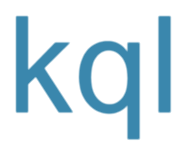

In [1]:
%reload_ext Kqlmagic

## Step 2. Construct the connection string to Log Analytics workspace, and connect!

To use Azure Authentication Directory (AAD) to connect to your Log Analytics workspace, you'll need the following:
1. Tenant ID of your Azure Account.
2. Workspace ID of your Log Analytics account.

Once you know these two details, you're ready to construct the connection string. Here's the format required:

```%kql loganalytics://code;tenant='<Tenant ID>';workspace='<Log Analytics Workspace ID>';alias='<alias to this connection>'```

The next few steps will outline how you can get the two details before we proceed.


### **2.a. Get the Tenant ID of your Azure Account**

You'll need to get the Tentnat ID of the Azure Account that your Log Analytics workspace resides. 

1.  Go to http://portal.azure.com and login to your Azure account.
    
2.  Go to "Azure Active Directory". Here's one way of launching it.  
    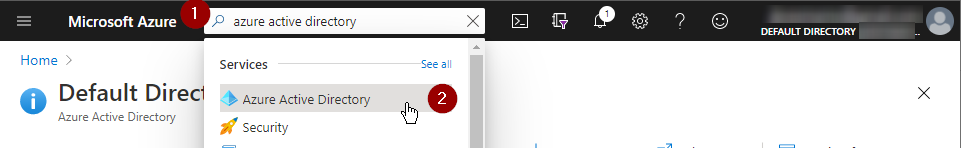
    
3.  You should see something like the following, where you can get the Tenant ID of your Active Directory account.  
    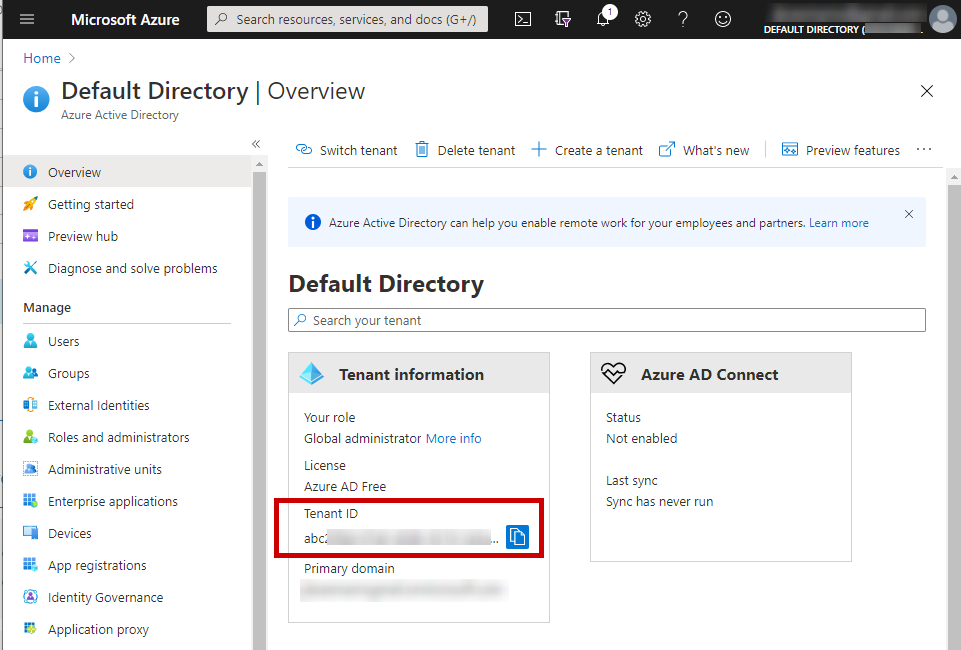

### **2.b. Get the Workspace ID of your Log Analytics**

In Azure Portal, go to your Log Analytics workspace.

Find the Workspace ID, see below:  
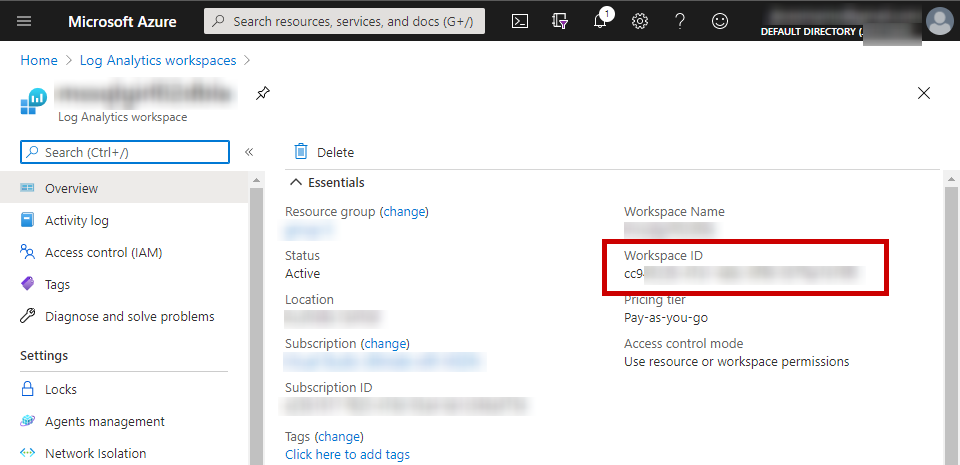

### **2.c. Connect to Log Analytics Workspace**

Execute the next cell to provide your Azure Tenant ID and your Log Analytics Workspace ID. This will help to form the connection for you.

> **Note**: This is an example of how we are passing details from Python variables to form a Kql magic connection. Alternatively, you can construct this on your own like the following:
> 
> %kql loganalytics://code;tenant='_abc\[truncated\]_';workspace='_cc9\[truncated\]_';alias='_myLA_'
> 
> I've only included the first three characters of both Tenant ID and Workspace ID here so that you can refer to them from the above picture. I've manually obfuscated the tenant ID and workspace id in the code result below :D So if you try connecting, it will not work :) 

In [2]:
tenantID = input('Enter your Azure Tenant ID')
logAnalyticsWorkspaceID = input('Enter your Log Analytics Workspace ID')
laAlias = input('Enter an alias for this connection')

print('Here\'s the connection string that it will form:')
print('%kql loganalytics://code;tenant="' + tenantID + '";workspace="' + logAnalyticsWorkspaceID + '";alias="' + laAlias +'"');

Here's the connection string that it will form:
%kql loganalytics://code;tenant="abc5600d-8888-8888-8888-af88203add38";workspace="cc9ec0b7-7777-7777-7777-c42a6d44e3d0";alias="myLA"


1. Now execute the next cell and follow the instruction. It will show a 9-characters code and a button.  
2. Copy the code and click on the "Copy code to clipboard and authenticate" button. You will be asked to login to your Azure Portal.  
3. Follow the rest of the instruction to login to your Azure account.

In [ ]:
%kql loganalytics://code;tenant=tenantID;workspace=logAnalyticsWorkspaceID;alias=laAlias

## Step 3. Write and run KQL query examples!

Here, I'm providing two examples on how to query a Log Analytics workspace. In these examples, I've already got my database `mssqlgirlawesomedb` connected to my Log Analytics workspace, so I have nice SQL log data to do some queries against. 

> **Tip**: Check out [Azure SQL DB and Azure Log Analytics Better Together - Part 1](https://techcommunity.microsoft.com/t5/azure-database-support-blog/azure-sql-db-and-log-analytics-better-together-part-1/ba-p/794833#:~:text=%20AZURE%20SQL%20DB%20AND%20LOG%20ANALYTICS%20BETTER,the%20database%20using%20a%20language%20called...%20More%20) on how to connect your Azure SQL DB with Azure Log Analytics.

> **Tip**: Check out [Azure SQL DB - Restore to a point in time](https://docs.microsoft.com/en-us/learn/modules/azure-sql-high-availability/3-exercise-restore-point-in-time) module from Azure SQL Funamentals training to spark some ideas on how you can better leverage Log Analytics for your Azure SQL databases.

### **Example 1: Get 10 rows from AzureDiagnostics with some filters**

Since my Log Analytics demo below is linked to my Azure SQL DB account, I can do some analysis like seeing how many BATCH COMPLETED events.

> **Tip**: You can change the query below to your Azure SQL DB's logical server name and for a certain action name. The Azure Diagnostic table is very rich and contains lots of data :) 

In [6]:
%%kql
AzureDiagnostics
| where LogicalServerName_s == "mssqlgirlawesomedb" and action_name_s == "BATCH COMPLETED"
| project originalEventTimestamp_t, action_name_s, statement_s
| take 10

,originalEventTimestamp_t,action_name_s,statement_s
0,2020-11-07 23:57:02.609000+00:00,BATCH COMPLETED,"SELECT SERVERPROPERTY('EngineEdition'), SERVER..."
1,2020-11-07 23:57:02.609000+00:00,BATCH COMPLETED,"SELECT ISNULL(SESSIONPROPERTY ('ANSI_NULLS'), ..."
2,2020-11-07 23:57:02.609000+00:00,BATCH COMPLETED,"SELECT SERVERPROPERTY('EngineEdition'), SERVER..."
3,2020-11-07 23:57:02.609000+00:00,BATCH COMPLETED,"SELECT ISNULL(SESSIONPROPERTY ('ANSI_NULLS'), ..."
4,2020-11-07 23:57:02.609000+00:00,BATCH COMPLETED,"SELECT CONVERT(NVARCHAR(36), CONTEXT_INFO())"
5,2020-11-07 23:57:02.609000+00:00,BATCH COMPLETED,"SELECT ISNULL(SESSIONPROPERTY ('ANSI_NULLS'), ..."
6,2020-11-07 23:57:02.609000+00:00,BATCH COMPLETED,"SELECT CONVERT(NVARCHAR(36), CONTEXT_INFO())"
7,2020-11-07 23:57:02.609000+00:00,BATCH COMPLETED,set LOCK_TIMEOUT 5000
8,2020-11-07 23:57:02.609000+00:00,BATCH COMPLETED,"SET ANSI_NULLS, ANSI_PADDING, ANSI_WARNINGS, A..."
9,2020-11-07 23:57:03.609000+00:00,BATCH COMPLETED,"SELECT SERVERPROPERTY('EngineEdition'), SERVER..."


[{'originalEventTimestamp_t': datetime.datetime(2020, 11, 7, 23, 57, 2, 609000, tzinfo=tzutc()), 'action_name_s': 'BATCH COMPLETED', 'statement_s': "SELECT SERVERPROPERTY('EngineEdition'), SERVERPROPERTY('productversion'), SERVERPROPERTY ('productlevel'), SERVERPROPERTY ('edition'), SERVERPROPERTY ('MachineName'), SERVERPROPERTY ('ServerName'), (SELECT CASE WHEN EXISTS (SELECT TOP 1 1 from [sys].[all_columns] WITH (NOLOCK) WHERE name = N'xml_index_type' AND OBJECT_ID(N'sys.xml_indexes') = object_id) THEN 1 ELSE 0 END AS SXI_PRESENT)"},
 {'originalEventTimestamp_t': datetime.datetime(2020, 11, 7, 23, 57, 2, 609000, tzinfo=tzutc()), 'action_name_s': 'BATCH COMPLETED', 'statement_s': "SELECT ISNULL(SESSIONPROPERTY ('ANSI_NULLS'), 0), ISNULL(SESSIONPROPERTY ('QUOTED_IDENTIFIER'), 1)"},
 {'originalEventTimestamp_t': datetime.datetime(2020, 11, 7, 23, 57, 2, 609000, tzinfo=tzutc()), 'action_name_s': 'BATCH COMPLETED', 'statement_s': "SELECT SERVERPROPERTY('EngineEdition'), SERVERPROPERTY('productversion'), SERVERPROPERTY ('productlevel'), SERVERPROPERTY ('edition'), SERVERPROPERTY ('MachineName'), SERVERPROPERTY ('ServerName'), (SELECT CASE WHEN EXISTS (SELECT TOP 1 1 from [sys].[all_columns] WITH (NOLOCK) WHERE name = N'xml_index_type' AND OBJECT_ID(N'sys.xml_indexes') = object_id) THEN 1 ELSE 0 END AS SXI_PRESENT)"},
 {'originalEventTimestamp_t': datetime.datetime(2020, 11, 7, 23, 57, 2, 609000, tzinfo=tzutc()), 'action_name_s': 'BATCH COMPLETED', 'statement_s': "SELECT ISNULL(SESSIONPROPERTY ('ANSI_NULLS'), 0), ISNULL(SESSIONPROPERTY ('QUOTED_IDENTIFIER'), 1)"},
 {'originalEventTimestamp_t': datetime.datetime(2020, 11, 7, 23, 57, 2, 609000, tzinfo=tzutc()), 'action_name_s': 'BATCH COMPLETED', 'statement_s': 'SELECT CONVERT(NVARCHAR(36), CONTEXT_INFO())'},
 {'originalEventTimestamp_t': datetime.datetime(2020, 11, 7, 23, 57, 2, 609000, tzinfo=tzutc()), 'action_name_s': 'BATCH COMPLETED', 'statement_s': "SELECT ISNULL(SESSIONPROPERTY ('ANSI_NULLS'), 0), ISNULL(SESSIONPROPERTY ('QUOTED_IDENTIFIER'), 1)"},
 {'originalEventTimestamp_t': datetime.datetime(2020, 11, 7, 23, 57, 2, 609000, tzinfo=tzutc()), 'action_name_s': 'BATCH COMPLETED', 'statement_s': 'SELECT CONVERT(NVARCHAR(36), CONTEXT_INFO())'},
 {'originalEventTimestamp_t': datetime.datetime(2020, 11, 7, 23, 57, 2, 609000, tzinfo=tzutc()), 'action_name_s': 'BATCH COMPLETED', 'statement_s': 'set LOCK_TIMEOUT 5000'},
 {'originalEventTimestamp_t': datetime.datetime(2020, 11, 7, 23, 57, 2, 609000, tzinfo=tzutc()), 'action_name_s': 'BATCH COMPLETED', 'statement_s': 'SET ANSI_NULLS, ANSI_PADDING, ANSI_WARNINGS, ARITHABORT, CONCAT_NULL_YIELDS_NULL, QUOTED_IDENTIFIER ON;\r\nSET NUMERIC_ROUNDABORT OFF;'},
 {'originalEventTimestamp_t': datetime.datetime(2020, 11, 7, 23, 57, 3, 609000, tzinfo=tzutc()), 'action_name_s': 'BATCH COMPLETED', 'statement_s': "SELECT SERVERPROPERTY('EngineEdition'), SERVERPROPERTY('productversion'), SERVERPROPERTY ('productlevel'), SERVERPROPERTY ('edition'), SERVERPROPERTY ('MachineName'), SERVERPROPERTY ('ServerName'), (SELECT CASE WHEN EXISTS (SELECT TOP 1 1 from [sys].[all_columns] WITH (NOLOCK) WHERE name = N'xml_index_type' AND OBJECT_ID(N'sys.xml_indexes') = object_id) THEN 1 ELSE 0 END AS SXI_PRESENT)"}]

### **Example 2: Summarize Action Name from the AzureDiagnostic table**

Let's summarize the actions captured in Azure Diagnostic for the specific Azure SQL database server.

In [7]:
%%kql
AzureDiagnostics
| where LogicalServerName_s == "mssqlgirlawesomedb" 
| summarize count() by action_name_s
| take 10

,action_name_s,count_
0,DATABASE AUTHENTICATION SUCCEEDED,25
1,BATCH COMPLETED,135
2,RPC COMPLETED,33
3,AUDIT SESSION CHANGED,2


[{'action_name_s': 'DATABASE AUTHENTICATION SUCCEEDED', 'count_': 25},
 {'action_name_s': 'BATCH COMPLETED', 'count_': 135},
 {'action_name_s': 'RPC COMPLETED', 'count_': 33},
 {'action_name_s': 'AUDIT SESSION CHANGED', 'count_': 2}]

# Summary

This notebook gives an example of connecting to an Azure Log Analytics workspace with user authentication, and write queries against the workspace, using Kqlmagic in a Python notebook in Azure Data Studio.

## Resources

-   [Kqlmagic in Azure Data Studio](https://docs.microsoft.com/sql/azure-data-studio/notebooks/notebooks-kqlmagic) - this explains what Kqlmagic is, how to install, and some of the use cases.
-   [Check Kqlmagic Installation](https://github.com/MsSQLGirl/jubilant-data-wizards/blob/main/Useful%20Notebooks/CheckKqlmagicInstallation.ipynb) - this is the notebook that you can use to follow and install Kqlmagic.
-   Get Azure Data Studio - [http://aka.ms/getAzureDataStudio](http://aka.ms/getAzureDataStudio)
-  Join my presentation on 28 Nov 2020 at 11:30am SGT on [Kusto Query Language (KQL) in Azure Data Studio](https://www.sqlsaturday.com/1019/Sessions/Details/sid/108601)